In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import yfinance as yf 
crypt = "BTC-USD"
start_date = "2019-01-01"
end_date = "2024-01-01"
df = yf.download(crypt, start=start_date, end=end_date)
print(df)


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2019-01-01   3746.713379   3850.913818   3707.231201   3843.520020   
2019-01-02   3849.216309   3947.981201   3817.409424   3943.409424   
2019-01-03   3931.048584   3935.685059   3826.222900   3836.741211   
2019-01-04   3832.040039   3865.934570   3783.853760   3857.717529   
2019-01-05   3851.973877   3904.903076   3836.900146   3845.194580   
...                  ...           ...           ...           ...   
2023-12-27  42518.468750  43683.160156  42167.582031  43442.855469   
2023-12-28  43468.199219  43804.781250  42318.550781  42627.855469   
2023-12-29  42614.644531  43124.324219  41424.062500  42099.402344   
2023-12-30  42091.753906  42584.125000  41556.226562  42156.902344   
2023-12-31  42152.097656  42860.937500  41998.253906  42265.187500   

               Adj Close       Volume  
Date                                   
2019-01-0

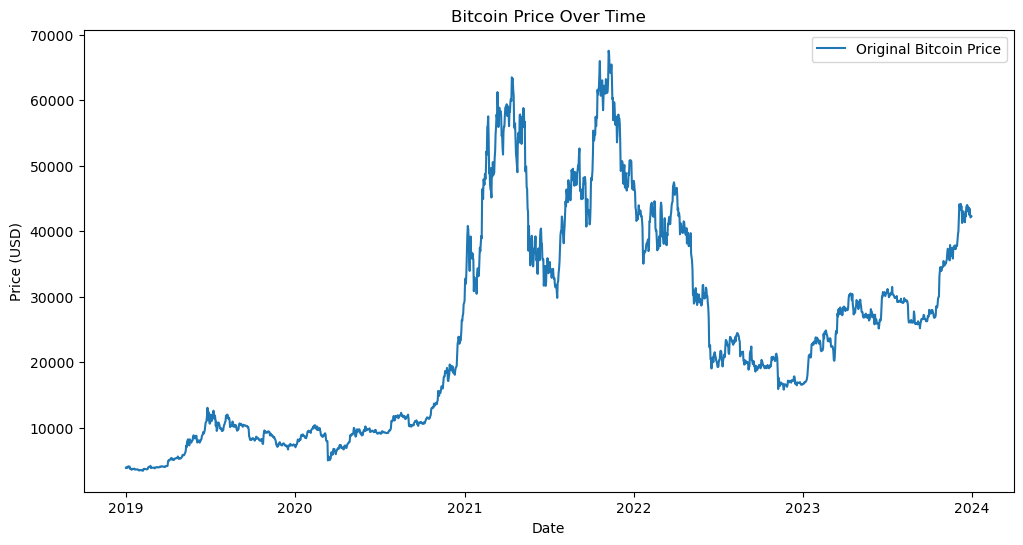

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'],label='Original Bitcoin Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

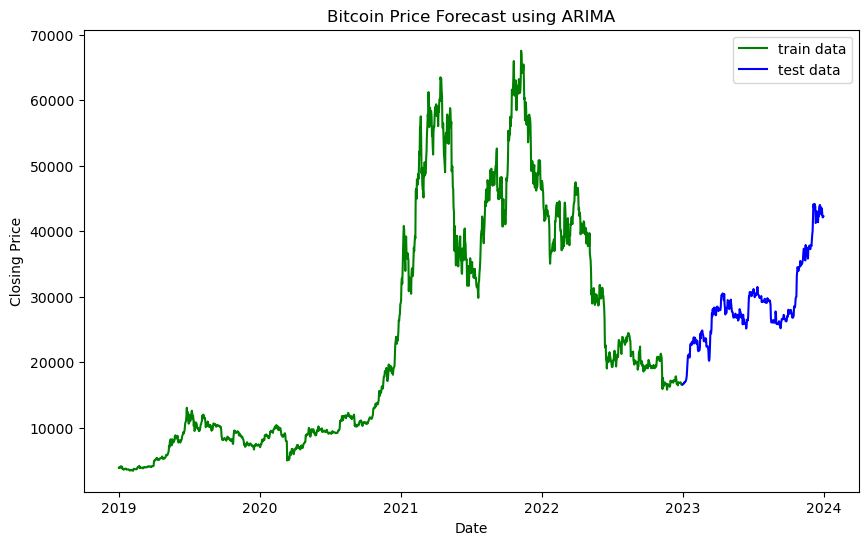

In [5]:
to_row = int(len(df) * 0.8)
training_data = list(df[0:to_row]['Close'])
testing_data = list(df[to_row:]['Close'])
plt.figure(figsize=(10, 6))
plt.title('Bitcoin Price Forecast using ARIMA')
plt.plot(df[0:to_row]['Close'],'green',label='train data')
plt.plot(df[to_row:]['Close'],'blue',label='test data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

In [6]:
model_prediction=list()
test_obs=len(testing_data)

In [7]:
for i in range(test_obs):
    model = ARIMA(training_data,order=(5,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_prediction.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1825
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -15248.901
Date:                Sun, 21 Apr 2024   AIC                          30511.803
Time:                        10:17:41   BIC                          30550.364
Sample:                             0   HQIC                         30526.028
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1659      1.063      0.156      0.876      -1.917       2.249
ar.L2          0.0185      0.037      0.499      0.618      -0.054       0.091
ar.L3          0.0212      0.021      0.997      0.3

In [9]:
output = pd.DataFrame(data={'predictions':model_prediction,'Actuals':testing_data})
output

,predictions,Actuals
0,16594.076312,16547.496094
1,16542.611277,16625.080078
2,16622.369936,16688.470703
3,16684.616149,16679.857422
4,16679.704272,16863.238281
...,...,...
361,42538.699420,43442.855469
362,43382.789173,42627.855469
363,42654.366738,42099.402344
364,42092.603422,42156.902344


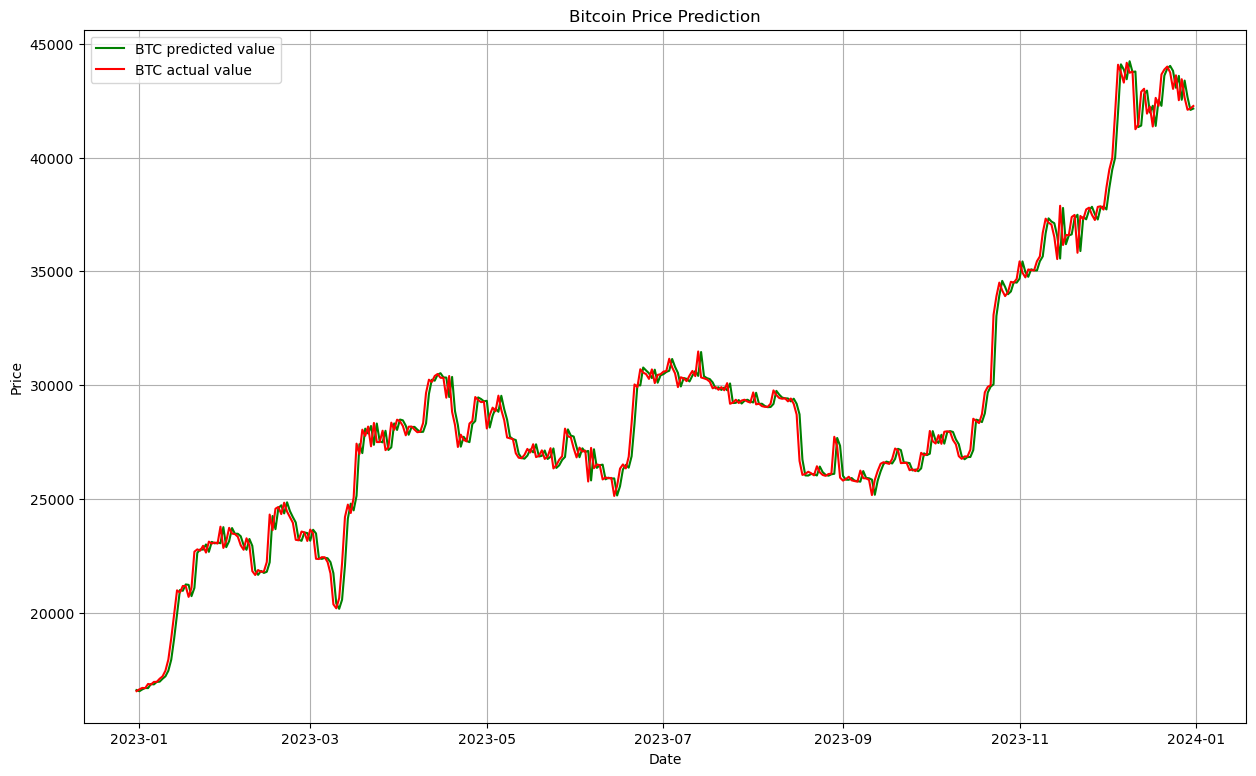

In [10]:
to_row = int(len(df) * 0.8)
model_prediction = np.array(model_prediction)
testing_data = np.array(testing_data)
plt.figure(figsize = (15,9))
plt.grid(True)
data_range = df[to_row:].index
plt.plot(data_range,model_prediction,color='Green',label="BTC predicted value")
plt.plot(data_range,testing_data,color='red',label="BTC actual value")
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [11]:
mae = np.mean(np.abs(model_prediction - testing_data))
mse = np.mean(np.square(model_prediction - testing_data))
rmse1 = np.sqrt(mse)
mape = np.mean(mae / testing_data) * 100
print("Mean Absolute Error: "+str(mae))   
print("Mean Squared Error: "+str(mse)) 
print("Root Mean Squared Error: "+str(rmse1)) 
print("Mean Absolute Percentage Error: "+str(mape),"%") 

Mean Absolute Error: 436.99438423359567
Mean Squared Error: 426624.7031055871
Root Mean Squared Error: 653.1651422921979
Mean Absolute Percentage Error: 1.5780207398461448 %
